# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saynshand
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | dunedin
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | yarmouth
Processing Record 11 of Set 1 | vernon
Processing Record 12 of Set 1 | urangan
Processing Record 13 of Set 1 | deori khas
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | enewetak
Processing Record 16 of Set 1 | pachino
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | mulanje
Processing Record 19 of Set 1 | prieska
Processing Record 20 of Set 1 | okha
Processing Record 21 of Set 1 | kolonia town
Processing Record 22 of Set 1 | adamstown
Processing Record 23 o

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saynshand,44.8824,110.1163,23.57,37,67,1.75,MN,1722788233
1,punta arenas,-53.1500,-70.9167,1.06,86,75,2.57,CL,1722788234
2,port lincoln,-34.7333,135.8667,10.64,80,99,0.98,AU,1722788235
3,edinburgh of the seven seas,-37.0676,-12.3116,13.11,86,62,13.93,SH,1722788236
4,pacific grove,36.6177,-121.9166,13.97,97,100,4.92,US,1722788237


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saynshand,44.8824,110.1163,23.57,37,67,1.75,MN,1722788233
1,punta arenas,-53.1500,-70.9167,1.06,86,75,2.57,CL,1722788234
2,port lincoln,-34.7333,135.8667,10.64,80,99,0.98,AU,1722788235
3,edinburgh of the seven seas,-37.0676,-12.3116,13.11,86,62,13.93,SH,1722788236
4,pacific grove,36.6177,-121.9166,13.97,97,100,4.92,US,1722788237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

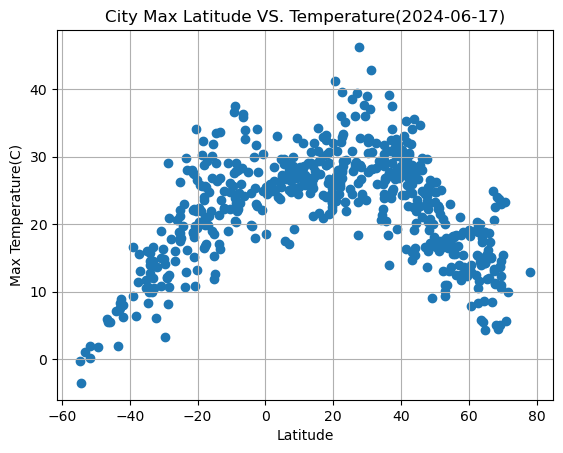

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude VS. Temperature(2024-06-17)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

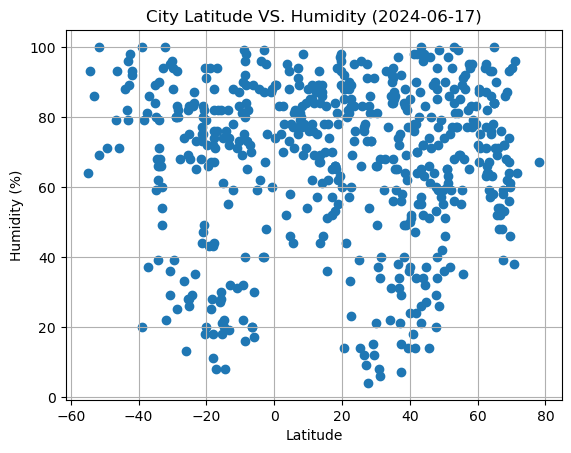

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude VS. Humidity (2024-06-17)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

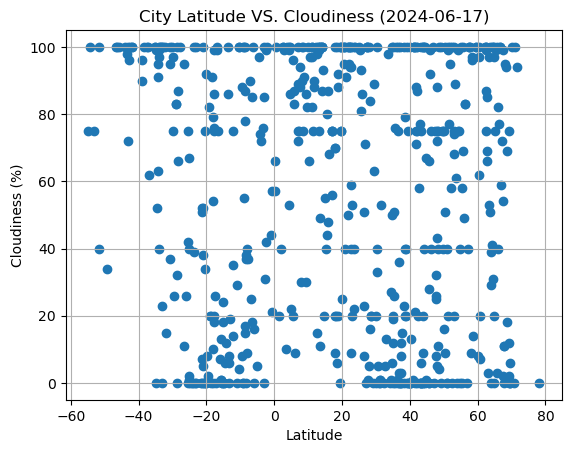

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude VS. Cloudiness (2024-06-17)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

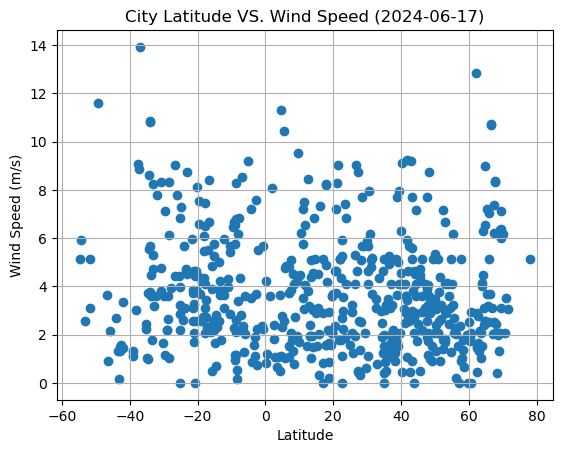

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude VS. Wind Speed (2024-06-17)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"The r^2-value is: {rvalue**2}")

plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saynshand,44.8824,110.1163,23.57,37,67,1.75,MN,1722788233
4,pacific grove,36.6177,-121.9166,13.97,97,100,4.92,US,1722788237
8,albany,42.6001,-73.9662,24.74,80,58,0.45,US,1722788242
9,yarmouth,41.7057,-70.2286,29.42,78,75,9.26,US,1722788153
10,vernon,50.2581,-119.2691,26.27,51,100,1.34,CA,1722788245


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,punta arenas,-53.1500,-70.9167,1.06,86,75,2.57,CL,1722788234
2,port lincoln,-34.7333,135.8667,10.64,80,99,0.98,AU,1722788235
3,edinburgh of the seven seas,-37.0676,-12.3116,13.11,86,62,13.93,SH,1722788236
5,avarua,-21.2078,-159.7750,22.03,73,7,3.09,CK,1722788239
6,ushuaia,-54.8000,-68.3000,-0.19,64,75,5.14,AR,1722788240


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3916925627152335


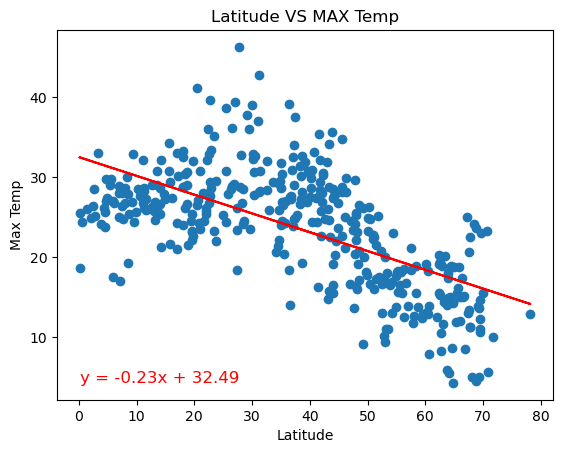

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude VS MAX Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.6464675326689097


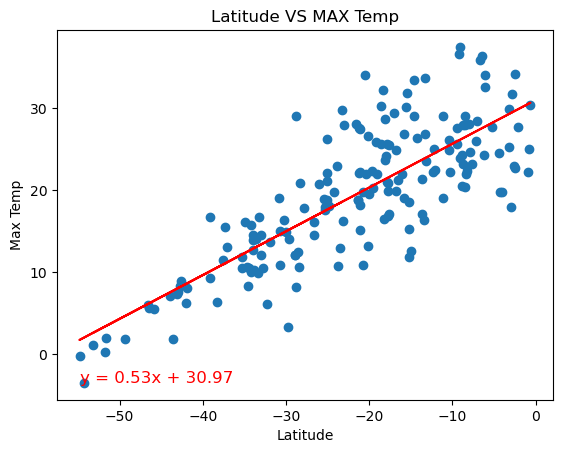

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude VS MAX Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.003154353627595416


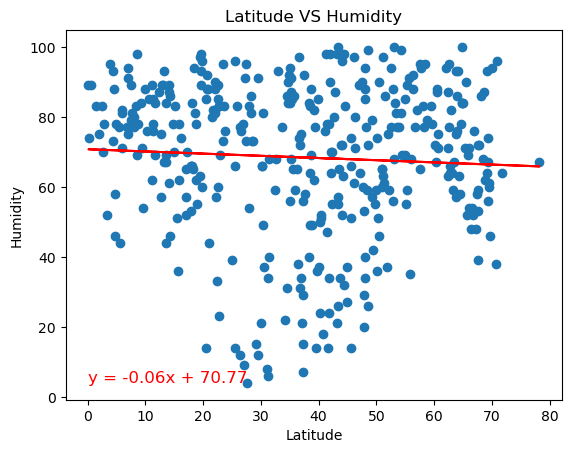

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.030350851032564057


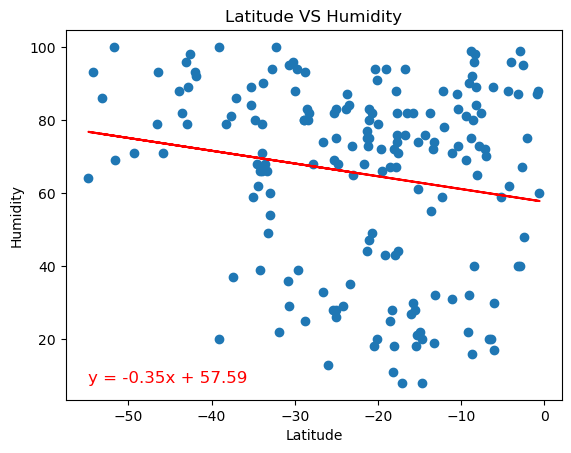

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude VS Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.02799605684849236


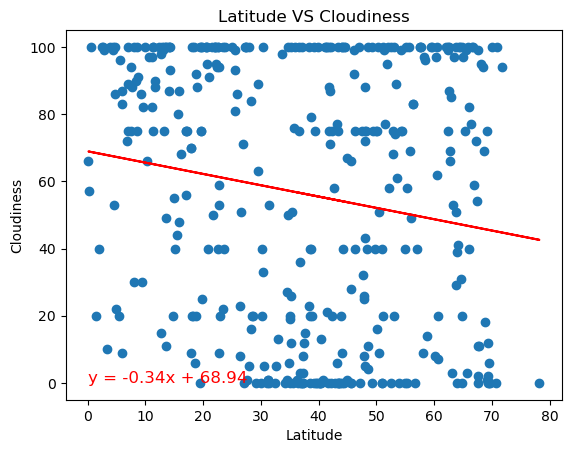

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.1102390645599339


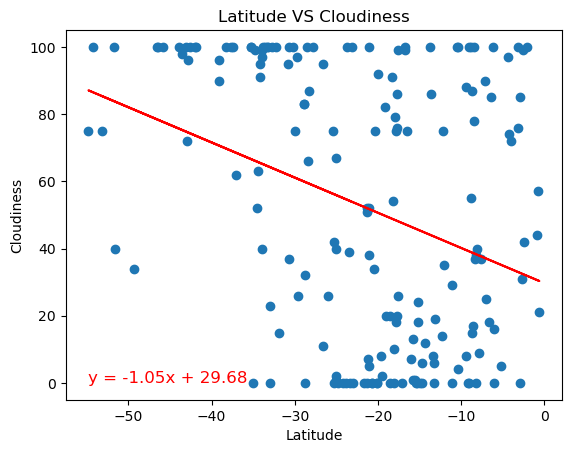

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude VS Cloudiness")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 4.850398709550959e-05


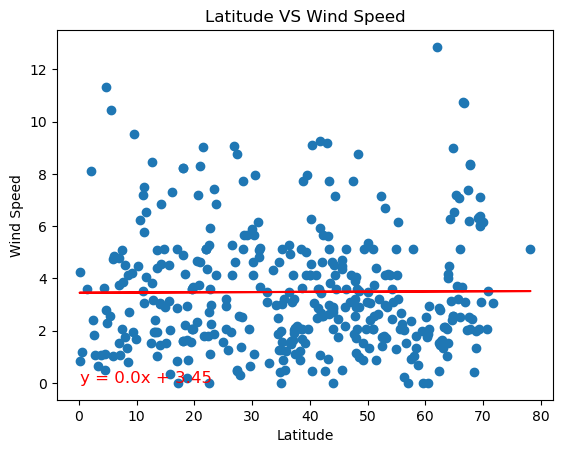

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS Wind Speed")

print(f"The r^2-value is: {rvalue**2}")


The r^2-value is: 0.005057317522794781


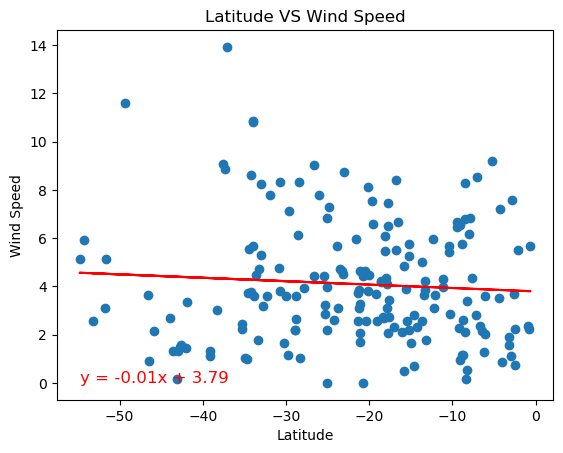

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude VS Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE